In [18]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the dataset into a pandas DataFrame
# Assuming your dataset is in a CSV file, you can load it using pd.read_csv
# Replace 'your_dataset.csv' with the actual file name
df = pd.read_csv('./Student Mental health.csv')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Handling missing values
df = df.dropna()

# Encoding categorical variables
label_encoders = {}
for column in ['Choose your gender', 'What is your course?', 'Your current year of Study', 
               'What is your CGPA?', 'Marital status']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Encoding target variable
target_le = LabelEncoder()
df['Do you have Depression?'] = target_le.fit_transform(df['Do you have Depression?'])

# Selecting features and target
X = df.drop(['Timestamp', 'Do you have Depression?', 'Do you have Anxiety?', 
               'Do you have Panic attack?', 'Did you seek any specialist for a treatment?'], axis=1)
y = df['Do you have Depression?']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Checking the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse i

((79, 6), (20, 6), (79,), (20,))

In [3]:
# Training the k-NN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Making predictions on the test set
y_pred = knn.predict(X_test)

# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

conf_matrix, class_report

(array([[14,  2],
        [ 1,  3]]),
 '              precision    recall  f1-score   support\n\n           0       0.93      0.88      0.90        16\n           1       0.60      0.75      0.67         4\n\n    accuracy                           0.85        20\n   macro avg       0.77      0.81      0.78        20\nweighted avg       0.87      0.85      0.86        20\n')

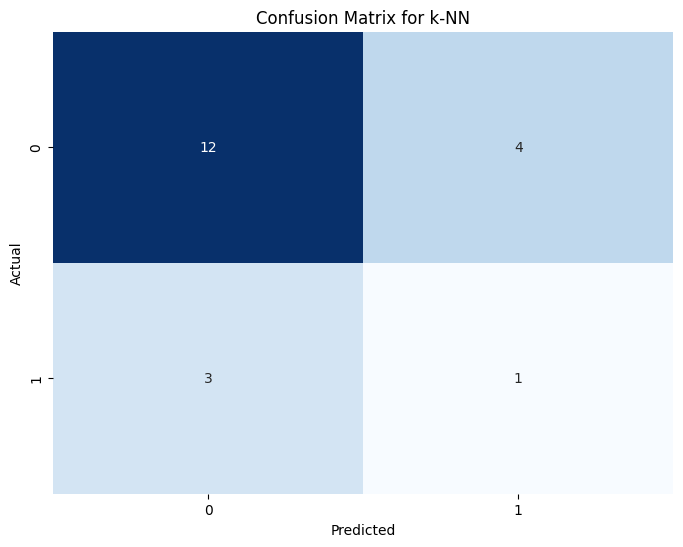

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for k-NN')
plt.savefig('knn_confusion_matrix.png')  # Save the confusion matrix as an image
plt.show()

# Save the classification report as a text file
with open('knn_classification_report.txt', 'w') as file:
    file.write(class_report)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Preprocessing the data

# Dropping the 'Timestamp' column as it's not relevant for the analysis
df = df.drop(columns=['Timestamp'])

# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Check for missing values
missing_values = df.isnull().sum()

# Filling missing values with the median (as a simple imputation strategy)
df.fillna(df.median(), inplace=True)

# Selecting features and target variable
X = df.drop(columns=['Do you have Depression?'])  # Features
y = df['Do you have Depression?']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = svm_model.predict(X_test)

# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

(conf_matrix, class_report)

/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse i

(array([[12,  4],
        [ 3,  1]]),
 '              precision    recall  f1-score   support\n\n           0       0.80      0.75      0.77        16\n           1       0.20      0.25      0.22         4\n\n    accuracy                           0.65        20\n   macro avg       0.50      0.50      0.50        20\nweighted avg       0.68      0.65      0.66        20\n')

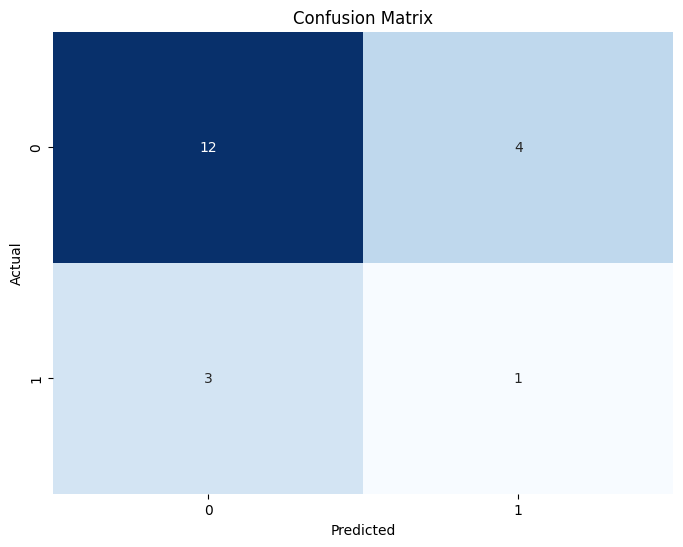

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Handling missing values - Fill numeric missing values with mean and categorical with mode
df.fillna({
    'Age': df['Age'].mean(),
    'Choose your gender': df['Choose your gender'].mode()[0],
    'What is your course?': df['What is your course?'].mode()[0],
    'Your current year of Study': df['Your current year of Study'].mode()[0],
    'What is your CGPA?': df['What is your CGPA?'].mode()[0],
    'Marital status': df['Marital status'].mode()[0]
}, inplace=True)

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in ['Choose your gender', 'What is your course?', 'Your current year of Study', 'What is your CGPA?', 'Marital status']:
    df[column] = label_encoder.fit_transform(df[column])

# Preparing the dfset for the model
X = df.drop(['Timestamp', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?'], axis=1)
y = df['Do you have Depression?'].apply(lambda x: 1 if x == 'Yes' else 0)

# Splitting the dfset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating the model
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)

report


/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse i

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        20\n\n    accuracy                           1.00        20\n   macro avg       1.00      1.00      1.00        20\nweighted avg       1.00      1.00      1.00        20\n'

/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


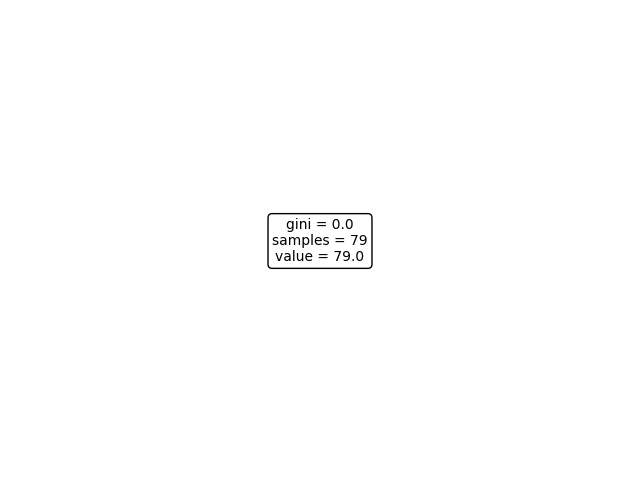

/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        20\n\n    accuracy                           1.00        20\n   macro avg       1.00      1.00      1.00        20\nweighted avg       1.00      1.00      1.00        20\n'

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame.

# Handling missing values - Fill numeric missing values with mean and categorical with mode
df.fillna({
    'Age': df['Age'].mean(),
    'Choose your gender': df['Choose your gender'].mode()[0],
    'What is your course?': df['What is your course?'].mode()[0],
    'Your current year of Study': df['Your current year of Study'].mode()[0],
    'What is your CGPA?': df['What is your CGPA?'].mode()[0],
    'Marital status': df['Marital status'].mode()[0]
}, inplace=True)

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in ['Choose your gender', 'What is your course?', 'Your current year of Study', 'What is your CGPA?', 'Marital status']:
    df[column] = label_encoder.fit_transform(df[column])

# Preparing the dataset for the model
X = df.drop(['Timestamp', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?'], axis=1)
y = df['Do you have Depression?'].apply(lambda x: 1 if x == 'Yes' else 0)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Plotting the decision tree
plt.figure(figsize=(8, 6))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Depression', 'Depression'], rounded=True, fontsize=10)
plt.show()

# Predicting and evaluating the model
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)

report


In [24]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset

# Data Preprocessing
# Handle missing values
df = df.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
df['Choose your gender'] = label_encoder.fit_transform(df['Choose your gender'])
df['What is your course?'] = label_encoder.fit_transform(df['What is your course?'])
df['Marital status'] = label_encoder.fit_transform(df['Marital status'])

# Standardize features
features = df[['Age', 'What is your CGPA?']]
scaler = StandardScaler()
df[['Age', 'What is your CGPA?']] = scaler.fit_transform(features)

# Define features and target variable
X = df[['Age', 'What is your CGPA?', 'Choose your gender', 'What is your course?', 'Marital status']]
y = df['Your current year of Study']  # Replace with the actual column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Print results
print(f'K-Nearest Neighbors Accuracy: {knn_accuracy}')
print(f'Support Vector Machine Accuracy: {svm_accuracy}')
print(f'Decision Tree Accuracy: {dt_accuracy}')


K-Nearest Neighbors Accuracy: 0.2
Support Vector Machine Accuracy: 0.45
Decision Tree Accuracy: 0.45


/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse i

/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse i

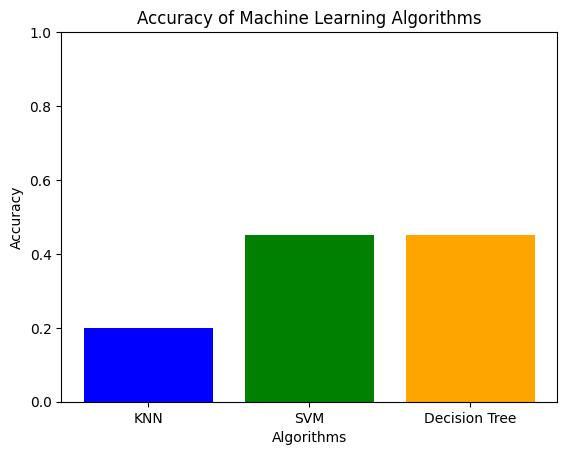

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = df.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
df['Choose your gender'] = label_encoder.fit_transform(df['Choose your gender'])
df['What is your course?'] = label_encoder.fit_transform(df['What is your course?'])
df['Marital status'] = label_encoder.fit_transform(df['Marital status'])

# Standardize features
features = df[['Age', 'What is your CGPA?']]
scaler = StandardScaler()
df[['Age', 'What is your CGPA?']] = scaler.fit_transform(features)

# Define features and target variable
X = df[['Age', 'What is your CGPA?', 'Choose your gender', 'What is your course?', 'Marital status']]
y = df['Your current year of Study']  # Replace with the actual column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Visualize results
algorithms = ['KNN', 'SVM', 'Decision Tree']
accuracies = [knn_accuracy, svm_accuracy, dt_accuracy]

plt.bar(algorithms, accuracies, color=['blue', 'green', 'orange'])
plt.title('Accuracy of Machine Learning Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to better visualize accuracy values
plt.show()


/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse i

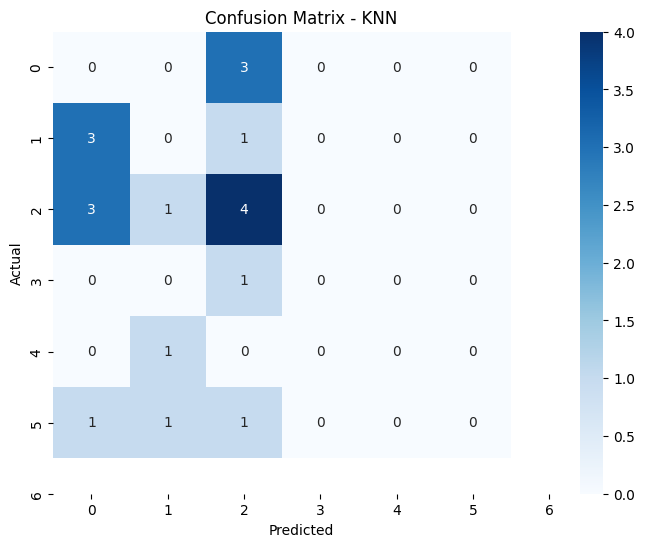

/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


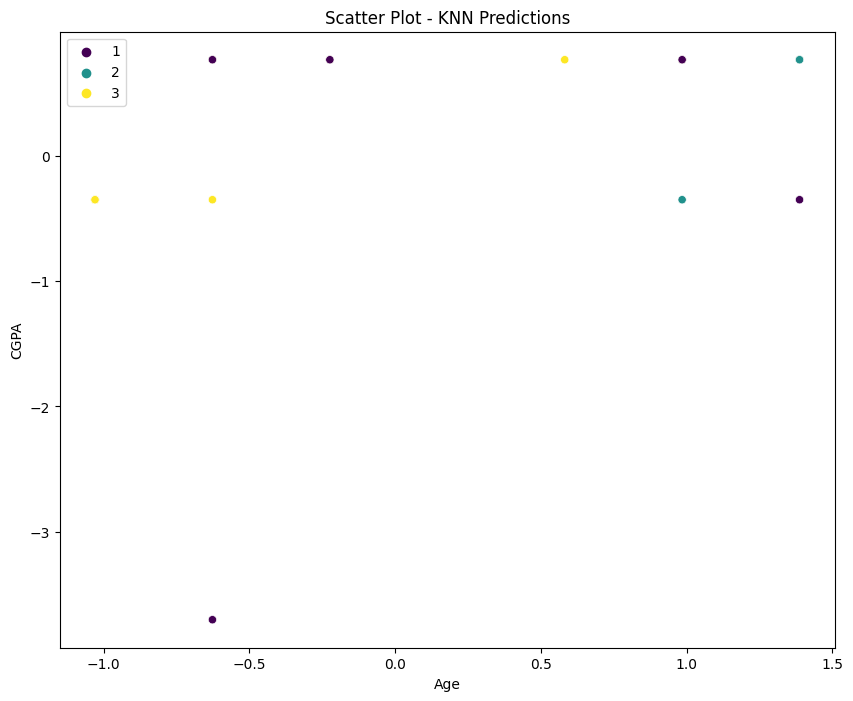

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dfset

# df Preprocessing
# Handle missing values
df = df.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
df['Choose your gender'] = label_encoder.fit_transform(df['Choose your gender'])
df['What is your course?'] = label_encoder.fit_transform(df['What is your course?'])
df['Marital status'] = label_encoder.fit_transform(df['Marital status'])

# Standardize features
features = df[['Age', 'What is your CGPA?']]
scaler = StandardScaler()
df[['Age', 'What is your CGPA?']] = scaler.fit_transform(features)

# Define features and target variable
X = df[['Age', 'What is your CGPA?', 'Choose your gender', 'What is your course?', 'Marital status']]
y = df['Your current year of Study']  # Replace with the actual column name

# Split the dfset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Confusion Matrix
cm = confusion_matrix(y_test, knn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_test['Age'], y=X_test['What is your CGPA?'], hue=knn_predictions, palette='viridis')
plt.title('Scatter Plot - KNN Predictions')
plt.xlabel('Age')
plt.ylabel('CGPA')
plt.show()


/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse i

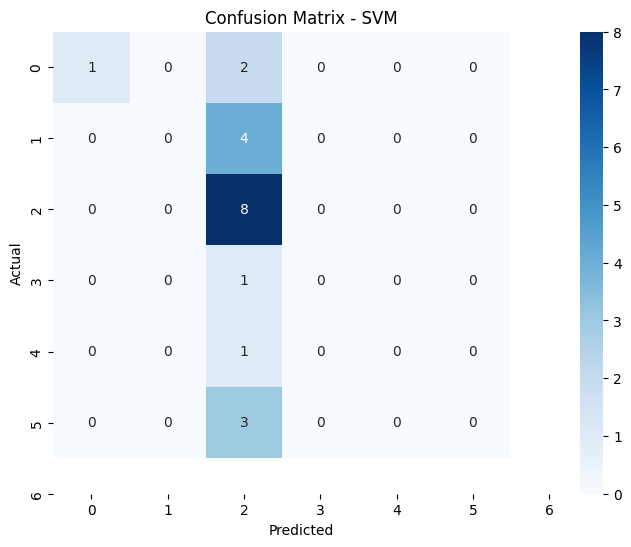

/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


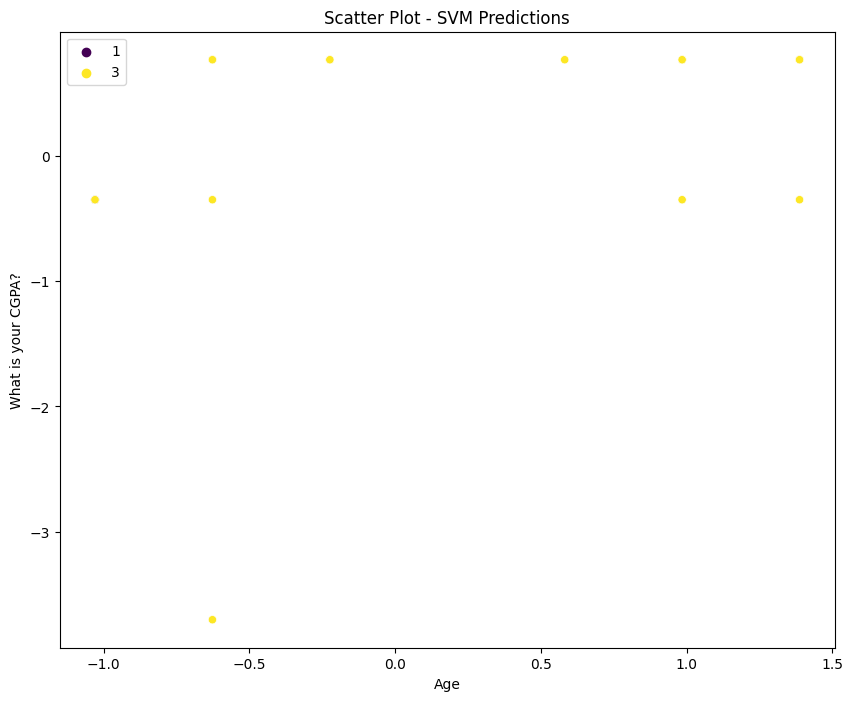

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dfset

# Data Preprocessing
# Handle missing values
df = df.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
df['Choose your gender'] = label_encoder.fit_transform(df['Choose your gender'])
df['What is your course?'] = label_encoder.fit_transform(df['What is your course?'])
df['Marital status'] = label_encoder.fit_transform(df['Marital status'])

# Standardize features
features = df[['Age', 'What is your CGPA?']]
scaler = StandardScaler()
df[['Age', 'What is your CGPA?']] = scaler.fit_transform(features)

# Define features and target variable
X = df[['Age', 'What is your CGPA?', 'Choose your gender', 'What is your course?', 'Marital status']]
y = df['Your current year of Study']  # Replace with the actual column name

# Split the dfset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Confusion Matrix
cm_svm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_test['Age'], y=X_test['What is your CGPA?'], hue=svm_predictions, palette='viridis')
plt.title('Scatter Plot - SVM Predictions')
plt.xlabel('Age')
plt.ylabel('What is your CGPA?')
plt.show()


/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse i

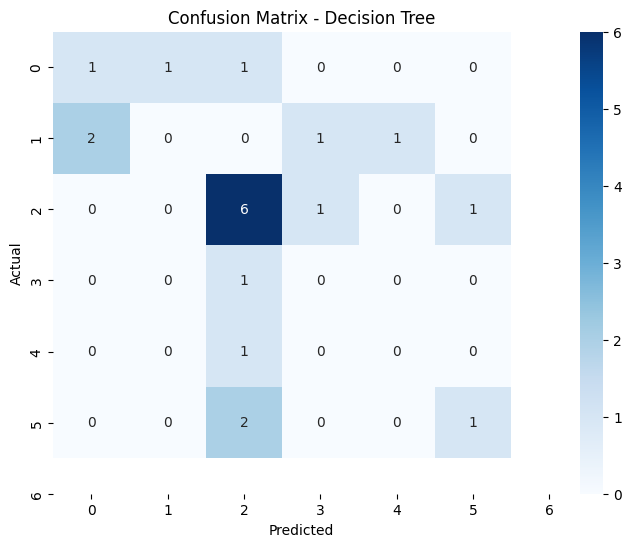

/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


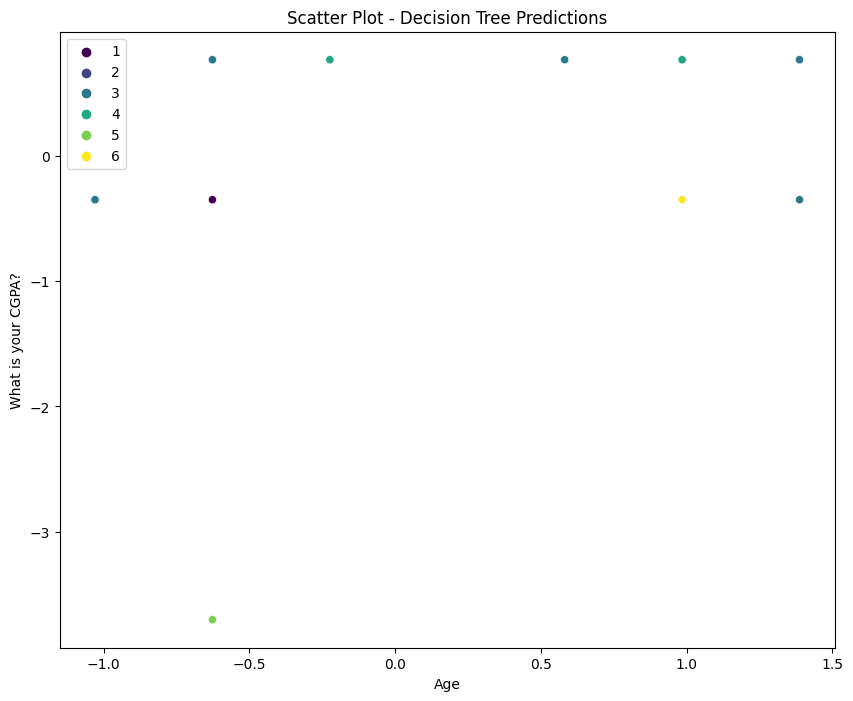

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dfset

# df Preprocessing
# Handle missing values
df = df.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
df['Choose your gender'] = label_encoder.fit_transform(df['Choose your gender'])
df['What is your course?'] = label_encoder.fit_transform(df['What is your course?'])
df['Marital status'] = label_encoder.fit_transform(df['Marital status'])

# Standardize features
features = df[['Age', 'What is your CGPA?']]
scaler = StandardScaler()
df[['Age', 'What is your CGPA?']] = scaler.fit_transform(features)

# Define features and target variable
X = df[['Age', 'What is your CGPA?', 'Choose your gender', 'What is your course?', 'Marital status']]
y = df['Your current year of Study']  # Replace with the actual column name

# Split the dfset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Confusion Matrix
cm_dt = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_test['Age'], y=X_test['What is your CGPA?'], hue=dt_predictions, palette='viridis')
plt.title('Scatter Plot - Decision Tree Predictions')
plt.xlabel('Age')
plt.ylabel('What is your CGPA?')
plt.show()


/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse i

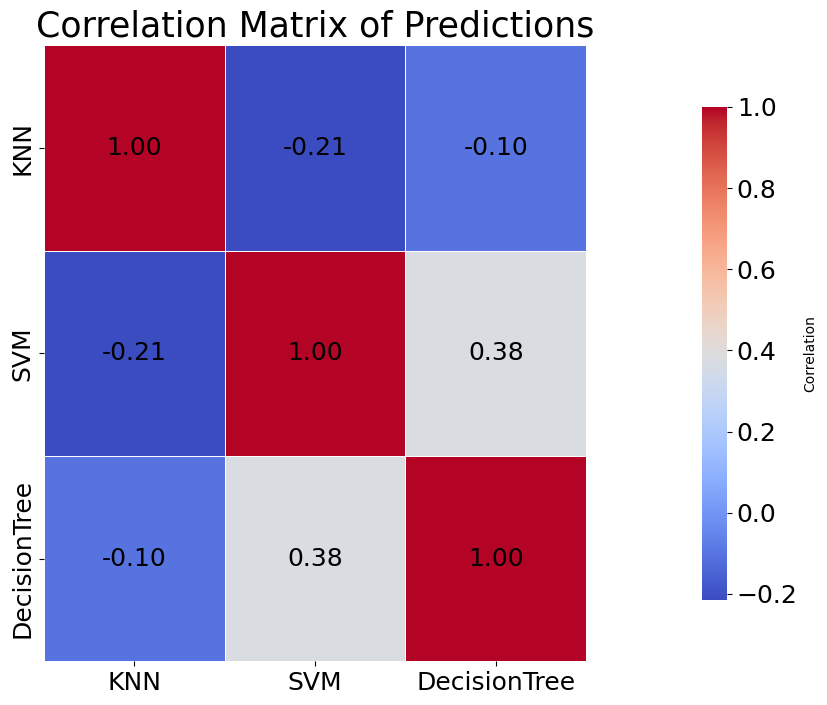

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = df.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
df['Choose your gender'] = label_encoder.fit_transform(df['Choose your gender'])
df['What is your course?'] = label_encoder.fit_transform(df['What is your course?'])
df['Marital status'] = label_encoder.fit_transform(df['Marital status'])

# Standardize features
features = df[['Age', 'What is your CGPA?']]
scaler = StandardScaler()
df[['Age', 'What is your CGPA?']] = scaler.fit_transform(features)

# Define features and target variable
X = df[['Age', 'What is your CGPA?', 'Choose your gender', 'What is your course?', 'Marital status']]
y = df['Your current year of Study']  # Replace with the actual column name


# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

# Create a DataFrame with predictions
predictions_df = pd.DataFrame({
    'KNN': knn_predictions,
    'SVM': svm_predictions,
    'DecisionTree': dt_predictions
})

# Calculate the correlation matrix
correlation_matrix = predictions_df.corr()


plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5,
                      annot_kws={"size": 18, "color": 'black'}, cbar_kws={"label": "Correlation", "orientation": "vertical", "shrink": 0.8, "pad": 0.15})
plt.title('Correlation Matrix of Predictions', fontsize=25)
plt.xticks(fontsize=18)  # Font size for x-axis labels (variables)
plt.yticks(fontsize=18)  # Font size for y-axis labels (variables)

# Adjust colorbar scale font size
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)

plt.show()

In [32]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming you already have X and y from your dataset
# Replace 'your_dataset.csv' with the actual file path if needed

# Load the dataset

# Load the dataset
df = df.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
df['Choose your gender'] = label_encoder.fit_transform(df['Choose your gender'])
df['What is your course?'] = label_encoder.fit_transform(df['What is your course?'])
df['Marital status'] = label_encoder.fit_transform(df['Marital status'])

# Standardize features
features = df[['Age', 'What is your CGPA?']]
scaler = StandardScaler()
df[['Age', 'What is your CGPA?']] = scaler.fit_transform(features)

# Define features and target variable
X = df[['Age', 'What is your CGPA?', 'Choose your gender', 'What is your course?', 'Marital status']]
y = df['Your current year of Study']  # Replace with the actual column name


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

report = classification_report(y_test, svm_predictions)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           1       1.00      0.33      0.50         3
           2       0.00      0.00      0.00         4
           3       0.42      1.00      0.59         8
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3

    accuracy                           0.45        20
   macro avg       0.24      0.22      0.18        20
weighted avg       0.32      0.45      0.31        20



/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse i

In [56]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Assuming you already have X and y from your dataset
# Replace 'your_dataset.csv' with the actual file path if needed

df = df.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
df['Choose your gender'] = label_encoder.fit_transform(df['Choose your gender'])
df['What is your course?'] = label_encoder.fit_transform(df['What is your course?'])
df['Marital status'] = label_encoder.fit_transform(df['Marital status'])

# Standardize features
features = df[['Age', 'What is your CGPA?']]
scaler = StandardScaler()
df[['Age', 'What is your CGPA?']] = scaler.fit_transform(features)

# Define features and target variable
X = df[['Age', 'What is your CGPA?', 'Choose your gender', 'What is your course?', 'Marital status']]
y = df['Your current year of Study']  # Replace with the actual column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

dt_report = classification_report(y_test, dt_predictions)

# Print the classification report for Decision Tree
print(dt_report)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.50      0.75      0.60         8
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3

    accuracy                           0.30        20
   macro avg       0.08      0.12      0.10        20
weighted avg       0.20      0.30      0.24        20



/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse i

In [34]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Assuming you already have X and y from your dataset
# Replace 'your_dataset.csv' with the actual file path if needed

# Load the dataset
df = df.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
df['Choose your gender'] = label_encoder.fit_transform(df['Choose your gender'])
df['What is your course?'] = label_encoder.fit_transform(df['What is your course?'])
df['Marital status'] = label_encoder.fit_transform(df['Marital status'])

# Standardize features
features = df[['Age', 'What is your CGPA?']]
scaler = StandardScaler()
df[['Age', 'What is your CGPA?']] = scaler.fit_transform(features)

# Define features and target variable
X = df[['Age', 'What is your CGPA?', 'Choose your gender', 'What is your course?', 'Marital status']]
y = df['Your current year of Study']  # Replace with the actual column name
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

# Get classification report for KNN
knn_report = classification_report(y_test, knn_predictions)

# Print the classification report for KNN
print(knn_report)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.40      0.50      0.44         8
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3

    accuracy                           0.20        20
   macro avg       0.07      0.08      0.07        20
weighted avg       0.16      0.20      0.18        20



/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse i